In [ ]:
#with Tech_Consump	Non_Tech_Consump	vs Units_Consumed

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [5]:
# Use the correct path (usually root `/content/` in Colab)
file_path = '/content/F3.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)


In [7]:
# Show the first few rows
df.head()

,Tech_Consump,Non_Tech_Consump,Units_Consumed
0,900,84,984
1,0,105,105
2,800,123,923
3,400,63,463
4,1500,152,1652


In [8]:
# Split data into features and target
X = df.drop(columns=['Units_Consumed'])  # Assuming 'Units' is your target column
y = df['Units_Consumed']

In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your features DataFrame

In [9]:
# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:

print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 4))

Mean Squared Error: 0.0
R² Score: 1.0


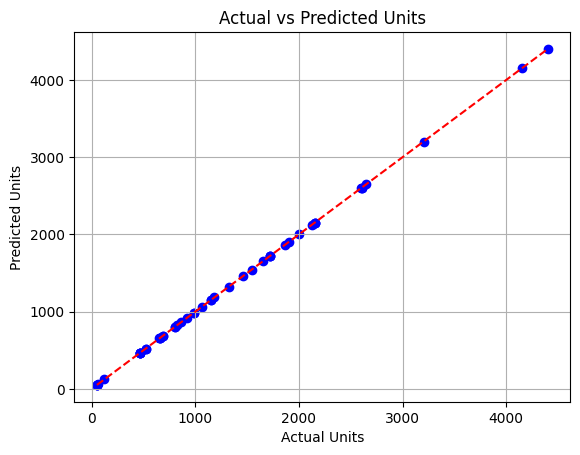

In [14]:
# Step 7: Visualize Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Units")
plt.ylabel("Predicted Units")
plt.title("Actual vs Predicted Units")
plt.grid(True)
plt.show()

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# --- Step 1: Define hardcoded input values ---
data = {
    'Tech_Consump': 500,
    'Non_Tech_Consump': 150
}

# --- Step 3: Create input DataFrame with correct order ---
X_input = pd.DataFrame([data])[['Tech_Consump', 'Non_Tech_Consump']]

# --- Step 4: Scale the input using the same scaler used during training ---
# X_input_scaled = scaler.transform(X_input)  # 👈 Important step

# --- Step 5: Predict using trained model ---
predicted_units = model.predict(X_input)[0]

# --- Step 6: Output prediction ---
print(f"🔮 Predicted Units Consumed: {predicted_units:.2f}")


🔮 Predicted Units Consumed: 650.00


In [17]:
import numpy as np
import pandas as pd

# --- Step 1: Hardcoded inputs for 7 feeders ---
feeders_data = [
    {'Tech_Consump': 500, 'Non_Tech_Consump': 150},
    {'Tech_Consump': 520, 'Non_Tech_Consump': 140},
    {'Tech_Consump': 510, 'Non_Tech_Consump': 155},
    {'Tech_Consump': 530, 'Non_Tech_Consump': 160},
    {'Tech_Consump': 495, 'Non_Tech_Consump': 145},
    {'Tech_Consump': 505, 'Non_Tech_Consump': 150},
    {'Tech_Consump': 515, 'Non_Tech_Consump': 135},
]

# --- Step 2: Create DataFrame from hardcoded values ---
X_input = pd.DataFrame(feeders_data)

# --- Step 3: Predict units for each feeder ---
predicted_units_list = model.predict(X_input)

# --- Step 4: Predict temperature-based units ---
# For example: temp = 10
# temp_df = pd.DataFrame({'Temp': [10]})
temp_based_units = 130

# --- Step 5: Add temperature-based units to each feeder prediction ---
final_units_list = predicted_units_list + temp_based_units

# --- Step 6: Sum all final predicted units for 7 feeders ---
total_predicted_units = np.sum(final_units_list)

# --- Step 7: Show results ---
for i, val in enumerate(final_units_list, start=1):
    print(f"Feeder {i} Predicted Units (with Temp): {val:.2f}")

print(f"\n🔢 Total Predicted Units for All Feeders: {total_predicted_units:.2f}")


Feeder 1 Predicted Units (with Temp): 780.00
Feeder 2 Predicted Units (with Temp): 790.00
Feeder 3 Predicted Units (with Temp): 795.00
Feeder 4 Predicted Units (with Temp): 820.00
Feeder 5 Predicted Units (with Temp): 770.00
Feeder 6 Predicted Units (with Temp): 785.00
Feeder 7 Predicted Units (with Temp): 780.00

🔢 Total Predicted Units for All Feeders: 5520.00
